In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [7]:

# ? RMSE FOR LOSS FUNCTION

In [8]:
categorical_features = []
numerical_features = []

for i in train:
    if train[i].dtype == 'object':
        train[i] = train[i].astype('category')
        categorical_features.append(i)
    else:
        numerical_features.append(i)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'cap-diameter'}>],
       [<Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>]], dtype=object)

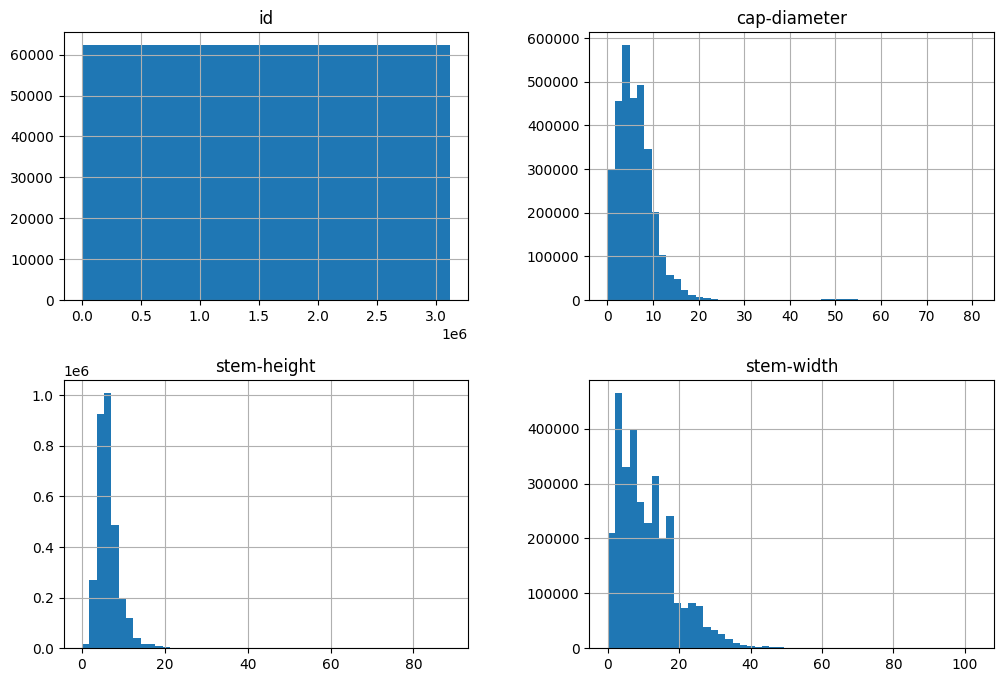

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

train.hist(bins = 50, figsize=(12, 8))

In [10]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [11]:

# ? Feature Major Categories with value counts > 100

cap_shape = ['x', 'f', 's', 'b', 'o', 'p', 'c']
cap_surface = ['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l']
cap_color = ['n', 'y', 'w', 'g', 'e', 'o', 'p', 'r', 'u', 'b', 'k', 'l']
does_bruise_or_bleed = ['f', 't']
gill_attachment =['a', 'd', 'x', 'e', 's', 'p', 'f']
gill_spacing = ['c', 'd', 'f']
gill_color = ['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u']
stem_root = ['b', 's', 'r', 'c', 'f']
stem_surface = ['s', 'y', 'i', 't', 'g', 'k', 'h', 'f']
stem_color = ['w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b', 'f']
veil_type = ['u']
veil_color = ['w', 'y', 'n', 'u', 'k', 'e']
has_ring = ['f', 't']
ring_type = ['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm']
spore_print_color = ['k', 'p', 'w', 'n', 'r', 'u', 'g']
habitat = ['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u']
season = ['a', 'u', 'w', 's']

value_counts = train['season'].value_counts()
value_counts[:20]
value_counts[value_counts > 100].index.values.tolist()

['a', 'u', 'w', 's']

In [12]:
features_dict = {
    'cap_shape': ['x', 'f', 's', 'b', 'o', 'p', 'c'],
    'cap_surface': ['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l'],
    'cap_color': ['n', 'y', 'w', 'g', 'e', 'o', 'p', 'r', 'u', 'b', 'k', 'l'],
    'does_bruise_or_bleed': ['f', 't'],
    'gill_attachment': ['a', 'd', 'x', 'e', 's', 'p', 'f'],
    'gill_spacing': ['c', 'd', 'f'],
    'gill_color': ['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u'],
    'stem_root': ['b', 's', 'r', 'c', 'f'],
    'stem_surface': ['s', 'y', 'i', 't', 'g', 'k', 'h', 'f'],
    'stem_color': ['w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b', 'f'],
    'veil_type': ['u'],
    'veil_color': ['w', 'y', 'n', 'u', 'k', 'e'],
    'has_ring': ['f', 't'],
    'ring_type': ['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm'],
    'spore_print_color': ['k', 'p', 'w', 'n', 'r', 'u', 'g'],
    'habitat': ['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u'],
    'season': ['a', 'u', 'w', 's']
}


In [24]:
cat_cols = [i for i in train.select_dtypes('category').columns if i != 'class']

In [38]:
def clean(df):
    for classes, cols  in zip(features_dict.keys(), cat_cols):
        df.loc[~df[cols].isin(features_dict[classes]), cols] = np.nan
    return df

train_2 = clean(train)

In [42]:
train_2['ring-type'].value_counts()

ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
3.12                          0
23.6                          0
2.87                          0
2                             0
15                            0
14                            0
11                            0
1                             0
does f                        0
d                             0
class                         0
c                             0
4                             0
8.25                          0
a                             0
b                             0
k                             0
i                             0
h                             0
does-bruise-or-bleed          0
o                             0
ring-type                     0
s                             

In [54]:
X = train.drop('class', axis = 1)
y = train['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state = 42)

In [55]:
y_train = y_train.map({"e":1, "p":0})
y_test = y_test.map({"e":1, "p":0})

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493556 entries, 586767 to 1559023
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   id                    int64   
 1   cap-diameter          float64 
 2   cap-shape             category
 3   cap-surface           category
 4   cap-color             category
 5   does-bruise-or-bleed  category
 6   gill-attachment       category
 7   gill-spacing          category
 8   gill-color            category
 9   stem-height           float64 
 10  stem-width            float64 
 11  stem-root             category
 12  stem-surface          category
 13  stem-color            category
 14  veil-type             category
 15  veil-color            category
 16  has-ring              category
 17  ring-type             category
 18  spore-print-color     category
 19  habitat               category
 20  season                category
dtypes: category(17), float64(3), int64(1)
memory usage: 13

In [57]:
numerical_features_preprocessing = numerical_features
categorical_features_preprocessing = categorical_features

numerical_features.remove('id')
categorical_features.remove('class')

In [58]:
categorical_features_preprocessing

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [59]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='constant')
X_train_imputed = imp.fit_transform(X_train)


In [60]:
categorical_features_preprocessing


['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [61]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline



cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant'),
    OneHotEncoder(handle_unknown='ignore'))

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())


preprocessing = ColumnTransformer([    
    ('num', num_pipeline, numerical_features_preprocessing),
    ('cat', cat_pipeline, categorical_features_preprocessing),
    ],
    remainder = 'passthrough'
)



In [62]:
X_train_preprocessed_sparse = preprocessing.fit_transform(X_train)

In [63]:
import xgboost as xgb
from xgboost import XGBClassifier

In [64]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [65]:
pipeline = make_pipeline(preprocessing, bst)

In [66]:
pipeline.fit(X_train, y_train)

c:\Users\hugph\ML\s4e8\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotE...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=2, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [67]:
y_pred = pipeline.predict(X_test)

In [68]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
matthews_corrcoef(y_test, y_pred)

np.float64(0.40442483483028585)